In [1]:
# Victor Z and David Cole
# UW-Madison, 2024
# pdf and cdf of a hypergeometric RV

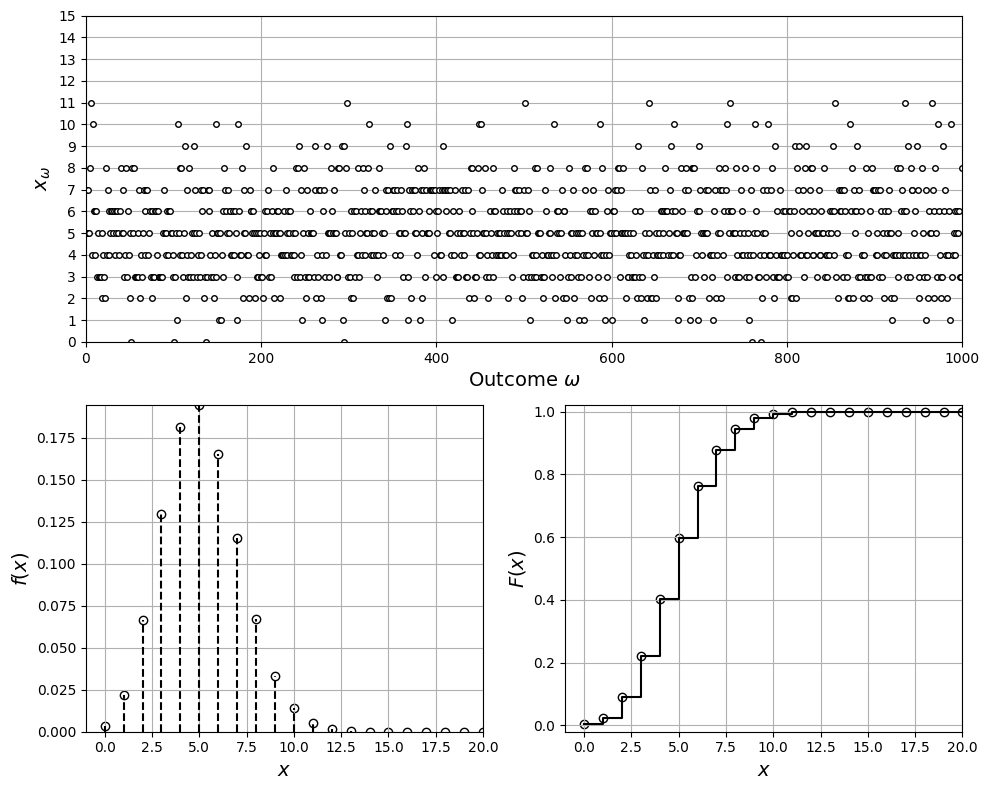

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import hypergeom

# Parameters
N = 500  # population
n = 50   # sample size
Ny = 50  # population of type Y
x = np.arange(0, min(n, Ny) + 1)
n = len(x)

# PDF calculation
f = np.zeros(n)
for j in range(n):
    f[j] = comb(Ny, x[j]) * comb(N - Ny, n - x[j]) / comb(N, n)

# Empirical CDF calculation
t = np.arange(0, n + 1)
F = np.zeros(len(t))
for i in range(len(t)):
    F[i] = np.sum(f[x <= t[i]])

# Generate realizations
S = 1000
np.random.seed(0)
X = hypergeom.rvs(N, Ny, n, size=S)

# Plotting
plt.figure(figsize=(10, 8))

# Subplot 1: Realizations
plt.subplot(2, 2, (1, 2))
plt.plot(X, 'ko', markerfacecolor='w', markersize=4)
plt.xlabel('Outcome $\\omega$', fontsize=14)
plt.ylabel('$x_\\omega$', fontsize=14)
plt.grid(True)
plt.yticks(np.arange(0, 16, 1))
plt.axis([0, S, 0, 15])

# Subplot 2: PDF
plt.subplot(2, 2, 3)
for j in range(n):
    plt.plot([x[j]] * 100, np.linspace(0, f[j], 100), 'k--')
plt.scatter(x, f, facecolor='w', edgecolor='k')
plt.grid(True)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axis([min(x)-1, 20, min(f), max(f)])

# Subplot 3: CDF
plt.subplot(2, 2, 4)
plt.step(t, F, 'k-', where='post')
for j in range(n):
    plt.scatter(t[j], F[j], facecolor='w', edgecolor='k')
plt.grid(True)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)
plt.axis([min(x)-1, 20, -0.02, 1.02])

plt.tight_layout()
plt.show()